In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

In [13]:
df = pd.read_csv("HomeC_work.csv")

In [17]:
#11월 실제데이터와 예측데이터
df.head()

,real,predict,month,day,weekday,hour,minute
0,0.013283,-0.013313,11,1,Tuesday,0,1
1,0.068133,0.025262,11,1,Tuesday,0,2
2,0.118167,0.072004,11,1,Tuesday,0,3
3,0.699050,0.704830,11,1,Tuesday,0,4
4,0.666250,0.671340,11,1,Tuesday,0,5


In [18]:
# 시계열 월, 시간 정의
sw = [1,2,6,7,8,11,12]
sf = [3,4,5,9,10]
low = [13,14,15,16,17,18,19,20,21,22]
mid = [23,0,1,2,3,4,5,6]
high = [7,8,9,10,11,12]

In [23]:
warnings.filterwarnings('ignore')

In [24]:
# 경부하
df1 = df_t[df_t['hour'].isin(low)]
df1['fare'] = 107.0
df1

,real,predict,month,day,weekday,hour,minute,fare
779,0.378283,0.364753,11,1,Tuesday,13,0,107.0
780,0.379450,0.366014,11,1,Tuesday,13,1,107.0
781,0.374117,0.360244,11,1,Tuesday,13,2,107.0
782,0.383217,0.370085,11,1,Tuesday,13,3,107.0
783,0.377083,0.363455,11,1,Tuesday,13,4,107.0
...,...,...,...,...,...,...,...,...
43134,0.314483,0.301543,11,30,Wednesday,22,55,107.0
43135,0.312100,0.298957,11,30,Wednesday,22,56,107.0
43136,0.313083,0.300024,11,30,Wednesday,22,57,107.0
43137,0.321667,0.309326,11,30,Wednesday,22,58,107.0


In [25]:
# 중간부하
df2 = df_t[df_t['hour'].isin(mid)]
df2['fare'] = 153.0
df2

,real,predict,month,day,weekday,hour,minute,fare
0,0.013283,-0.013313,11,1,Tuesday,0,1,153.0
1,0.068133,0.025262,11,1,Tuesday,0,2,153.0
2,0.118167,0.072004,11,1,Tuesday,0,3,153.0
3,0.699050,0.704830,11,1,Tuesday,0,4,153.0
4,0.666250,0.671340,11,1,Tuesday,0,5,153.0
...,...,...,...,...,...,...,...,...
43194,0.947467,0.952020,11,30,Wednesday,23,55,153.0
43195,0.949917,0.954362,11,30,Wednesday,23,56,153.0
43196,0.925950,0.931391,11,30,Wednesday,23,57,153.0
43197,0.918600,0.924323,11,30,Wednesday,23,58,153.0


In [26]:
# 최대부하
df3 = df_t[df_t['hour'].isin(high)]
df3['fare'] = 188.8
df3

,real,predict,month,day,weekday,hour,minute,fare
419,1.737450,1.676485,11,1,Tuesday,7,0,188.8
420,1.729317,1.669187,11,1,Tuesday,7,1,188.8
421,1.636267,1.585148,11,1,Tuesday,7,2,188.8
422,1.811750,1.742807,11,1,Tuesday,7,3,188.8
423,1.588817,1.541889,11,1,Tuesday,7,4,188.8
...,...,...,...,...,...,...,...,...
42534,1.325933,1.324389,11,30,Wednesday,12,55,188.8
42535,1.328150,1.326431,11,30,Wednesday,12,56,188.8
42536,1.437433,1.426186,11,30,Wednesday,12,57,188.8
42537,1.425383,1.415273,11,30,Wednesday,12,58,188.8


In [40]:
# 부하시간대 합치고 정렬
df = pd.concat([df1,df2,df3])
df = df.sort_index()
df.head()

,real,predict,month,day,weekday,hour,minute,fare
0,0.013283,-0.013313,11,1,Tuesday,0,1,153.0
1,0.068133,0.025262,11,1,Tuesday,0,2,153.0
2,0.118167,0.072004,11,1,Tuesday,0,3,153.0
3,0.699050,0.704830,11,1,Tuesday,0,4,153.0
4,0.666250,0.671340,11,1,Tuesday,0,5,153.0


In [41]:
# 요금 계산
df['r_fare'] = df['real']*df['fare']
df['p_fare'] = df['predict']*df['fare']
df.head()

,real,predict,month,day,weekday,hour,minute,fare,r_fare,p_fare
0,0.013283,-0.013313,11,1,Tuesday,0,1,153.0,2.03235,-2.036848
1,0.068133,0.025262,11,1,Tuesday,0,2,153.0,10.42440,3.865098
2,0.118167,0.072004,11,1,Tuesday,0,3,153.0,18.07950,11.016584
3,0.699050,0.704830,11,1,Tuesday,0,4,153.0,106.95465,107.838952
4,0.666250,0.671340,11,1,Tuesday,0,5,153.0,101.93625,102.715018


In [44]:
# 시간 인덱스 추가
df['time'] = pd.DatetimeIndex(pd.date_range('2016-11-01 00:01', periods=len(df),  freq='min'))
df = df.set_index('time')
df.head()

,real,predict,month,day,weekday,hour,minute,fare,r_fare,p_fare
time,,,,,,,,,,
2016-11-01 00:01:00,0.013283,-0.013313,11,1,Tuesday,0,1,153.0,2.03235,-2.036848
2016-11-01 00:02:00,0.068133,0.025262,11,1,Tuesday,0,2,153.0,10.42440,3.865098
2016-11-01 00:03:00,0.118167,0.072004,11,1,Tuesday,0,3,153.0,18.07950,11.016584
2016-11-01 00:04:00,0.699050,0.704830,11,1,Tuesday,0,4,153.0,106.95465,107.838952
2016-11-01 00:05:00,0.666250,0.671340,11,1,Tuesday,0,5,153.0,101.93625,102.715018


In [45]:
# kw > KWh 요금 적용
df['r_fare'] = df['real'] * df['fare'] / 60
df['p_fare'] = df['predict'] * df['fare'] / 60

In [47]:
# 1일짜
d1 = df.loc[df['day']==1]
d1.tail()

,real,predict,month,day,weekday,hour,minute,fare,r_fare,p_fare
time,,,,,,,,,,
2016-11-01 23:55:00,0.433717,0.432073,11,1,Tuesday,23,55,153.0,1.105978,1.101787
2016-11-01 23:56:00,0.410500,0.406642,11,1,Tuesday,23,56,153.0,1.046775,1.036937
2016-11-01 23:57:00,0.181200,0.147966,11,1,Tuesday,23,57,153.0,0.462060,0.377314
2016-11-01 23:58:00,0.009483,0.000743,11,1,Tuesday,23,58,153.0,0.024182,0.001893
2016-11-01 23:59:00,0.011550,0.002184,11,1,Tuesday,23,59,153.0,0.029452,0.005570


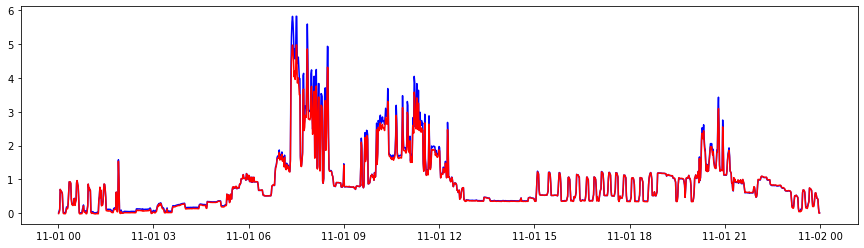

In [48]:
plt.figure(figsize=(15,4))
plt.plot(d1['real'], c='blue', label='real')
plt.plot(d1['predict'], c='red', label='predict')

In [49]:
#하루요금량
print(sum(d1['r_fare']))
print(sum(d1['p_fare']))

3455.3254258891334
3277.288801559349


In [51]:
# 1일차 시간대 정의
d1_h = d1[d1['hour'].isin(high)]
d1_m = d1[d1['hour'].isin(mid)]
d1_l = d1[d1['hour'].isin(low)]
d1_h.tail()

,real,predict,month,day,weekday,hour,minute,fare,r_fare,p_fare
time,,,,,,,,,,
2016-11-01 12:55:00,0.386750,0.373900,11,1,Tuesday,12,55,188.8,1.216973,1.176538
2016-11-01 12:56:00,0.387800,0.375033,11,1,Tuesday,12,56,188.8,1.220277,1.180103
2016-11-01 12:57:00,0.377917,0.364356,11,1,Tuesday,12,57,188.8,1.189178,1.146507
2016-11-01 12:58:00,0.377867,0.364302,11,1,Tuesday,12,58,188.8,1.189020,1.146337
2016-11-01 12:59:00,0.375317,0.361543,11,1,Tuesday,12,59,188.8,1.180996,1.137655


In [78]:
#수요이전 기준치 (평균값)
ref = np.mean(d1['predict'])
ref

0.8852744369823103

In [79]:
#수요이전 항목
ts = d1_h[d1_h.predict > ref] 
len(ts)

280

In [80]:
#수요이전 양 > 경부하계산
ts_t = ts['real']-ref
sum(ts_t)

384.3018076479533

In [81]:
# 수요이전 잔여 > 최대부하계산
ts['real'] = ref
sum(ts['real'])

247.8768423550476

In [82]:
# 기준치보다 적은 최대부하 전력 > 최대부하 계산
ts_n = d1_h[d1_h.predict < ref]
sum(ts_n['real'])

56.21368333599999

In [83]:
#중간부하, 경부하 계산
m_fare = sum(d1_m['real']*153.0)
l_fare = sum(d1_l['real']*107.0)

In [84]:
#수요이전 계산
ts_fare = sum(ts_t)*107.0 + sum(ts['real'])*188.8 + sum(ts_n['real'])*188.8 + m_fare + l_fare
ts_fare = ts_fare/60
ts_fare

2931.39396146243

In [85]:
# 절감율
(sum(d1['r_fare']) - ts_fare) / sum(d1['r_fare']) * 100

15.16301360506106

In [90]:
# 절감율이 20프로 이하이므로 중간부하에서 추가이전
# 수요이전 항목
ts2 = d1_m[d1_m.predict > ref]
print(len(ts2))
# 수요이전 양
ts2_t = ts2['real']-ref
print(sum(ts2_t))
# 수요이전 잔여
ts2['real'] = ref
print(sum(ts2['real']))
# 기준치보다 적은 중간부하 전력
ts2_n = d1_m[d1_m.predict < ref]
print(sum(ts2_n['real']))

50
11.725961485884481
44.263721849115484
123.4025333370001


In [93]:
#추가 중간부하 수요이전 계산
m2_fare = sum(ts2_t)*107.0 + sum(ts2['real'])*153.0 + sum(ts2_n['real'])*153.0
m2_fare/60

448.4602487077554

In [92]:
#최종 수요이전 계산
ts_fare = sum(ts_t)*107.0 + sum(ts['real'])*188.8 + sum(ts_n['real'])*188.8 + m2_fare + l_fare
ts_fare = ts_fare/60
ts_fare

2922.4040576565853

In [94]:
# 최종 절감율
(sum(d1['r_fare']) - ts_fare) / sum(d1['r_fare']) * 100

15.423188919909487

In [98]:
# 기준치가 0.5kw
ref = 0.5
#수요이전 항목
ts = d1_h[d1_h.predict > ref] 
#수요이전 양
ts_t = ts['real']-ref
ts['real'] = ref
ts_n = d1_h[d1_h.predict < ref]
ts_fare = sum(ts_t)*107.0 + sum(ts['real'])*188.8 + sum(ts_n['real'])*188.8 + m_fare + l_fare
ts_fare = ts_fare/60
(sum(d1['r_fare']) - ts_fare) / sum(d1['r_fare']) * 100

20.126191919916458